In [10]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [11]:
pip install python_speech_features

  Created wheel for python-speech-features: filename=python_speech_features-0.6-cp36-none-any.whl size=5887 sha256=b79316bc51f17b8c4b65f601308017d82a7b58f7b0d66bb533892f7c250fc56b
  Stored in directory: /root/.cache/pip/wheels/3c/42/7c/f60e9d1b40015cd69b213ad90f7c18a9264cd745b9888134be
Successfully built python-speech-features


In [0]:
import os
import matplotlib.pyplot as plt
import numpy as np
import glob
import librosa
import librosa.display
from python_speech_features import mfcc

In [0]:
cough = os.listdir('drive/My Drive/Coughing Dataset')
noise = os.listdir('drive/My Drive/Noise dataset/FSDnoisy18k.audio_test')

In [14]:
from keras.preprocessing.sequence import pad_sequences

Using TensorFlow backend.





1.   Cough - 1
2.   Noise - 0 




In [ ]:
count = 0 
X = []
y = []
for i in cough:
    print(count)
    audio , sr = librosa.load('drive/My Drive/Coughing Dataset/' + i)
    mfccs = mfcc(audio, samplerate=sr, winlen=0.025, winstep=0.01, numcep=13, nfilt=26, nfft=552, lowfreq=0, highfreq=None, preemph=0.97, ceplifter=22, appendEnergy=True)
    X.append(np.array(mfccs))
    y.append(1)
    count+=1
cough = os.listdir('drive/My Drive/Coughing Dataset')
noise = os.listdir('drive/My Drive/Noise dataset/FSDnoisy18k.audio_test')
for i in noise:
    print(count)
    audio ,sr = librosa.load('drive/My Drive/Noise dataset/FSDnoisy18k.audio_test/' + i)
    mfccs = mfcc(audio, samplerate=sr, winlen=0.025, winstep=0.01, numcep=13, nfilt=26, nfft=512, lowfreq=0, highfreq=None, preemph=0.97, ceplifter=22, appendEnergy=True)
    X.append(np.array(mfccs))
    y.append(0)
    count+=1  

In [0]:
XTrain = pad_sequences(X,maxlen=10000,padding = 'post')

In [0]:
XTrain = np.array(XTrain)
yTrain = np.array(y)

In [0]:
## Model

In [0]:
from keras.models import Model,Sequential
from keras.optimizers import Adam
from sklearn.model_selection import train_test_split
from keras.layers import *
from keras.utils import to_categorical

In [0]:
yTrain = to_categorical(yTrain)

In [79]:
model = Sequential()

model.add(Conv1D(8,13, padding = 'valid' , activation = 'relu' , strides = 1 , input_shape = (10000,13)))
model.add(MaxPooling1D())
model.add(Dropout(0.3))
model.add(Conv1D(16,13, padding = 'valid' , activation = 'relu' , strides = 1 ))
model.add(MaxPooling1D())
model.add(Dropout(0.3))
model.add(Conv1D(8,13, padding = 'valid' , activation = 'relu' , strides = 1 ))
model.add(MaxPooling1D())
model.add(Dropout(0.3))
model.add(BatchNormalization(axis=-1, momentum=0.99, epsilon=0.001, center=True, scale=True))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(LSTM(128, return_sequences=True))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(Dense(2 , activation = 'softmax'))
model.compile(loss = 'binary_crossentropy' , optimizer = 'adam' , metrics = ['accuracy'])
model.summary()

Model: "sequential_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv1d_37 (Conv1D)           (None, 9988, 8)           1360      
_________________________________________________________________
max_pooling1d_37 (MaxPooling (None, 4994, 8)           0         
_________________________________________________________________
dropout_49 (Dropout)         (None, 4994, 8)           0         
_________________________________________________________________
conv1d_38 (Conv1D)           (None, 4982, 16)          1680      
_________________________________________________________________
max_pooling1d_38 (MaxPooling (None, 2491, 16)          0         
_________________________________________________________________
dropout_50 (Dropout)         (None, 2491, 16)          0         
_________________________________________________________________
conv1d_39 (Conv1D)           (None, 2479, 8)         

In [0]:
X_train, X_test, y_train, y_test = train_test_split(XTrain, yTrain, test_size=0.2, random_state=42)

In [0]:
from keras.callbacks import ModelCheckpoint,EarlyStopping
#model.compile(optimizer='adam' , loss = 'binary_crossentropy' , metrics=['accuracy'])

In [82]:
checkpoint = ModelCheckpoint('save_best.h5', monitor = 'val_accuracy',verbose = 1 , save_best_only=True)
call_list = [checkpoint]

hist = model.fit(X_train , y_train , epochs=11 , callbacks=call_list , validation_data=(X_test,y_test))

Train on 1332 samples, validate on 333 samples
Epoch 1/11
1332/1332 [==============================] - 251s 188ms/step - loss: 0.7438 - accuracy: 0.7177 - val_loss: 0.5212 - val_accuracy: 0.7688

Epoch 00001: val_accuracy improved from -inf to 0.76877, saving model to save_best.h5
Epoch 2/11
1332/1332 [==============================] - 251s 189ms/step - loss: 0.4092 - accuracy: 0.8146 - val_loss: 0.4261 - val_accuracy: 0.8078

Epoch 00002: val_accuracy improved from 0.76877 to 0.80781, saving model to save_best.h5
Epoch 3/11
1332/1332 [==============================] - 254s 190ms/step - loss: 0.3717 - accuracy: 0.8333 - val_loss: 0.3844 - val_accuracy: 0.7928

Epoch 00003: val_accuracy did not improve from 0.80781
Epoch 4/11
1332/1332 [==============================] - 256s 192ms/step - loss: 0.3081 - accuracy: 0.8694 - val_loss: 0.2788 - val_accuracy: 0.8919

Epoch 00004: val_accuracy improved from 0.80781 to 0.89189, saving model to save_best.h5
Epoch 5/11
1332/1332 [================

In [0]:
model.load_weights('save_best.h5')

In [84]:
model.evaluate(X_test,y_test)

333/333 [==============================] - 5s 15ms/step


[0.07574432365618669, 0.9789789915084839]

In [0]:
import matplotlib.pyplot as plt

In [0]:
val_loss = hist.history['val_loss']
val_acc = hist.history['val_accuracy']
loss = hist.history['loss']
accuracy = hist.history['accuracy']

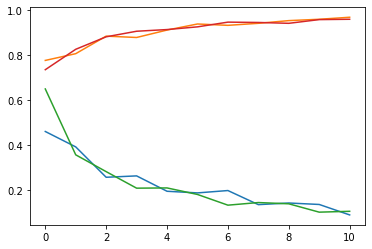

In [53]:
plt.plot(val_loss)
plt.plot(val_acc)
plt.plot(loss)
plt.plot(accuracy)